In [6]:
# Import C++ perceptron implementation
import neuralnet as nn
# Import other libraries
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
np.random.seed(123)

In [7]:

AdamArgs = (0.9, 0.999)

In [8]:
layers = [
    nn.TanH(784, 500, *AdamArgs), 
    nn.ReLU(500, 300, *AdamArgs), 
    nn.ReLU(300, 100, *AdamArgs), 
    nn.ReLU(100, 100, *AdamArgs), 
    nn.ReLU(100, 50, *AdamArgs), 
    nn.SoftMax(50, 10, *AdamArgs)
]

In [9]:
model = nn.Sequence(layers)

In [10]:
# Load training data
TRAIN_IN, TRAIN_OUT = pickle.load(open('../data/mnist_preprocessed.pickle', 'rb'))
N = 2
a = 0.00001

Epoch 0 average loss: 0.7374727482154333
Epoch 1 average loss: 0.41795859886356457
Training of model complete in 77.10645318031311 seconds per epoch.


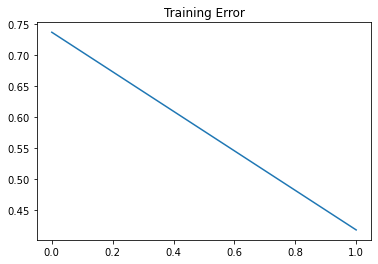

In [11]:
ts = time.time()
errors = nn.train(model, TRAIN_IN, TRAIN_OUT, N, a)
duration = time.time() - ts
print(f"Training of model complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()